-- Configuring done
-- Generating done
-- Build files have been written to: /home/dieguin/PancakeSorting/build
Consolidate compiler generated dependencies of target PancakeSorting
[100%] Built target PancakeSorting
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 

mkdir: cannot create directory ‘build’: File exists


Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
[0, 0.006398205998266349, 0.007412822000333108, 0.006356533001962816, 0.007406641998386476, 0.007742412002698984, 0.016982473000098253, 0.10752603600121802]
[0, 0.007309324999368982, 0.006771653997930116, 0.006329936500454399, 0.005570315791677179, 0.0058194420582064295, 0.005146772991717323, 0.005280753246759357]
[0, 0.007501699998101685, 0.006971787499423954, 0.006072657333182481, 0.005375497458165531, 0.005153542991653618, 0.0051846170029067355, 0.005071788442688875]
[1, 1.0, 1.0, 1.0, 1.1770833333333333, 1.2806944444444446, 1.3274867724867738, 1.3526653439153364]
[1, 1.0, 1.5, 1.8333333333333333, 2.125, 2.3197222222222225, 2.4663293650793667, 2.5800718065003823]


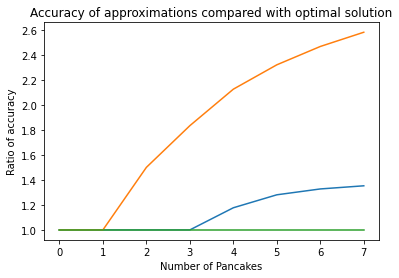

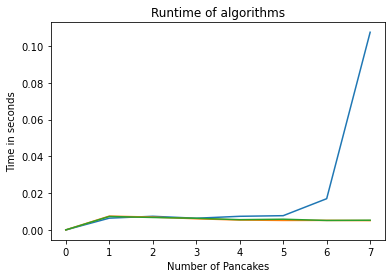

In [2]:
from os import stat
import subprocess
import sys
from itertools import permutations
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import timeit

subprocess.run(["mkdir build"], shell=True, cwd=".")
subprocess.run(["cmake .."], shell=True, cwd="./build")
subprocess.run(["make"], shell=True, cwd="./build")

original_stdout = sys.stdout

max_list_size = 7
actual_prom = [1]*(max_list_size + 1)
approx3_prom = [0]*(max_list_size + 1)
approx2_prom = [0]*(max_list_size + 1)
time_exhaustive = [0]*(max_list_size + 1)
time_approx3 = [0]*(max_list_size + 1)
time_approx2 = [0]*(max_list_size + 1)
distance = {}
    
for size in range(1, max_list_size + 1):
    print(size, flush=True, end = ' ')
    list_size = list(range(1, size + 1))
    s_input = "1st " + str(size) + " "
    perm = permutations(list_size)
    for order in perm:
        str_list = ' '.join(str(e) for e in order)
        s_input = s_input + str_list + " "
        
    start_time = timeit.default_timer()
    s = subprocess.check_output(["./PancakeSorting"], shell=True, cwd="./build", text=True, input=s_input)
    time_exhaustive[size] = timeit.default_timer() - start_time
    
    s = s.split("\n")
    pos = 0
    for order in permutations(list_size):
        distance[tuple(order)] = int(s[pos])
        pos += 1
    print("Done", flush=True)
    
for size in range(1, max_list_size + 1):
    print(size, flush=True, end = ' ')
    list_i = list(range(1, size + 1))
    c = 0
    for order in permutations(list_i):
        c += 1
        str_list = ' '.join(str(e) for e in order)
        s_input = "2nd " + str(size) + " " + str_list
        
        start_time = timeit.default_timer()
        s = subprocess.check_output(["./PancakeSorting"], shell=True, cwd="./build", text=True, input=s_input)
        time_approx3[size] += (timeit.default_timer() - start_time)
        
        s = s.split("\n")
        approx3 = int(s[0])
        actual_val = int(distance.get(tuple(order)))
                         
        approx3_prom[size] += (max(1, approx3)/max(1, actual_val))
    approx3_prom[size] /= c
    time_approx3[size] /= c
    print("Done", flush=True)

with open('filename.txt', 'w') as f:    
    for size in range(1, max_list_size + 1):
        print(size, flush=True, end = ' ')
        list_i = list(range(1, size + 1))
        c = 0
        for order in permutations(list_i):
            c += 1
            str_list = ' '.join(str(e) for e in order)
            s_input = "3rd " + str(size) + " " + str_list
            
            start_time = timeit.default_timer()
            s = subprocess.check_output(["./PancakeSorting"], shell=True, cwd="./build", text=True, input=s_input)
            time_approx2[size] += (timeit.default_timer() - start_time)

            s = s.split("\n")
            approx2 = int(s[0])
            if s[1] == "Ok":
                actual_val = int(distance.get(tuple(order)))
                
                approx2_prom[size] += (max(1, approx2)/max(1, actual_val))
            else:
                sys.stdout = f
                print(order, "FAILED")
                sys.stdout = original_stdout
        approx2_prom[size] /= c
        time_approx2[size] /= c
        print("Done", flush=True)

fig, ax = plt.subplots()
approx2_prom[0] = 1
approx3_prom[0] = 1
ax.plot(list(range(0, max_list_size + 1)), approx2_prom, label='Approx-2')
ax.plot(list(range(0, max_list_size + 1)), approx3_prom, label='Approx-3')
ax.plot(list(range(0, max_list_size + 1)), actual_prom, label='Exhaustive algorithm')
ax.set_title("Accuracy of approximations compared with optimal solution")
ax.set_xlabel("Number of Pancakes")
ax.set_ylabel("Ratio of accuracy")

fig2, ax2 = plt.subplots()
ax2.plot(list(range(0, max_list_size + 1)), time_exhaustive, label='Exhaustive algorithm')
ax2.plot(list(range(0, max_list_size + 1)), time_approx2, label='Approx-2')
ax2.plot(list(range(0, max_list_size + 1)), time_approx3, label='Approx-3')
ax2.set_title("Runtime of algorithms")
ax2.set_xlabel("Number of Pancakes")
ax2.set_ylabel("Time in seconds")

print(time_exhaustive)
print(time_approx3)
print(time_approx2)
print(approx2_prom)
print(approx3_prom)